In [416]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor 

In [417]:
# Load dataset
df0 = pd.read_csv("sub_data_9april.csv", header = 0)

In [418]:
sofa=pd.read_csv("Final cohort with SOFA.csv", header = 0)

In [419]:
df=df0.copy()

In [420]:
df = pd.merge(df,sofa[['subject_id','hadm_id','stay_id','sofa_24hours']],on=['subject_id','hadm_id','stay_id'], how='left')

In [421]:
# Check its data type and its dimension
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Columns: 225 entries, subject_id to sofa_24hours
dtypes: float64(79), int64(17), object(129)
memory usage: 354.9+ KB


In [422]:
df=df[(df['statin']!=2)]

In [423]:
list(df.columns)

['subject_id',
 'hadm_id',
 'stay_id',
 'first_careunit_1',
 'last_careunit_1',
 'intime_1',
 'outtime_1',
 'charttime_1',
 'storetime_1',
 'flag_1',
 'priority_1',
 'charttime_2',
 'storetime_2',
 'flag_2',
 'priority_2',
 'charttime_3',
 'storetime_3',
 'flag_3',
 'priority_3',
 'charttime_4',
 'storetime_4',
 'flag_4',
 'priority_4',
 'charttime_5',
 'storetime_5',
 'flag_5',
 'priority_5',
 'charttime_6',
 'storetime_6',
 'flag_6',
 'priority_6',
 'charttime_7',
 'storetime_7',
 'flag_7',
 'priority_7',
 'charttime_8',
 'storetime_8',
 'flag_8',
 'priority_8',
 'charttime_9',
 'storetime_9',
 'flag_9',
 'priority_9',
 'charttime_10',
 'storetime_10',
 'flag_10',
 'priority_10',
 'charttime_11',
 'storetime_11',
 'flag_11',
 'priority_11',
 'charttime_12',
 'storetime_12',
 'flag_12',
 'priority_12',
 'charttime_13',
 'storetime_13',
 'flag_13',
 'priority_13',
 'charttime_14',
 'storetime_14',
 'flag_14',
 'priority_14',
 'charttime_15',
 'storetime_15',
 'flag_15',
 'priority_15',

In [424]:
df['Intervention'].value_counts()

Non-statin       173
Statin before     28
Name: Intervention, dtype: int64

In [425]:
df=df[['sofa_24hours','change_1max2','Admission.Weight..Kg.','los_1','gender','anchor_age','creatinine_value_1',
 'Intervention',
 'first_careunit_1',
 'last_careunit_1',
 'statin',
 'Chronic_kidney_disease',
 'COPD',
 'Atrial_fibrillation',
 'hypertension',
 'Ischemic_heart_disease',
 'diabetes',
 'Cerebrovascular']]

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sofa_24hours            201 non-null    int64  
 1   change_1max2            201 non-null    float64
 2   Admission.Weight..Kg.   177 non-null    float64
 3   los_1                   201 non-null    float64
 4   gender                  201 non-null    object 
 5   anchor_age              201 non-null    int64  
 6   creatinine_value_1      201 non-null    float64
 7   Intervention            201 non-null    object 
 8   first_careunit_1        201 non-null    object 
 9   last_careunit_1         201 non-null    object 
 10  statin                  201 non-null    int64  
 11  Chronic_kidney_disease  201 non-null    int64  
 12  COPD                    201 non-null    int64  
 13  Atrial_fibrillation     201 non-null    int64  
 14  hypertension            201 non-null    in

In [427]:
df=df.dropna()

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 200
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sofa_24hours            177 non-null    int64  
 1   change_1max2            177 non-null    float64
 2   Admission.Weight..Kg.   177 non-null    float64
 3   los_1                   177 non-null    float64
 4   gender                  177 non-null    object 
 5   anchor_age              177 non-null    int64  
 6   creatinine_value_1      177 non-null    float64
 7   Intervention            177 non-null    object 
 8   first_careunit_1        177 non-null    object 
 9   last_careunit_1         177 non-null    object 
 10  statin                  177 non-null    int64  
 11  Chronic_kidney_disease  177 non-null    int64  
 12  COPD                    177 non-null    int64  
 13  Atrial_fibrillation     177 non-null    int64  
 14  hypertension            177 non-null    in

In [429]:
# Assign X and y
y=df['change_1max2']
X=df[['sofa_24hours','Admission.Weight..Kg.','los_1','gender','anchor_age','creatinine_value_1',
  'Intervention',
 'first_careunit_1',
 'last_careunit_1',
 'statin',
 'Chronic_kidney_disease',
 'COPD',
 'Atrial_fibrillation',
 'hypertension',
 'Ischemic_heart_disease',
 'diabetes',
 'Cerebrovascular']]

In [430]:
df['Intervention'].value_counts()

Non-statin       152
Statin before     25
Name: Intervention, dtype: int64

In [431]:
X

,sofa_24hours,Admission.Weight..Kg.,los_1,gender,anchor_age,creatinine_value_1,Intervention,first_careunit_1,last_careunit_1,statin,Chronic_kidney_disease,COPD,Atrial_fibrillation,hypertension,Ischemic_heart_disease,diabetes,Cerebrovascular
0,0,107.0,9.076829,M,72,1.4,Non-statin,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),0,1,1,0,0,0,0,0
1,3,106.1,11.106817,F,80,1.8,Non-statin,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU),0,0,0,0,0,1,0,0
2,3,52.0,1.750694,M,54,5.7,Statin before,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),1,0,0,0,0,0,0,0
3,1,40.0,2.137269,M,77,1.1,Non-statin,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),0,0,1,0,1,0,0,0
4,1,71.0,1.820602,F,63,0.7,Non-statin,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8,80.0,10.699711,M,64,2.9,Non-statin,Trauma SICU (TSICU),Trauma SICU (TSICU),0,0,0,0,1,0,0,0
196,0,56.5,0.823484,F,60,5.3,Non-statin,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),0,0,0,0,0,0,0,0
197,1,47.5,0.545880,F,89,1.3,Non-statin,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),0,0,0,0,1,0,0,0
198,0,81.1,1.407037,F,56,0.9,Non-statin,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),0,0,0,0,0,0,0,0


In [432]:
#One-hot-enconding for categorical columns
X=pd.get_dummies(data=X,columns=[ 'gender','first_careunit_1', 'Intervention',
 'last_careunit_1'],drop_first=True)

In [433]:
# define min max scaler
#scaler = MinMaxScaler()
# transform data
#X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#X

<AxesSubplot:ylabel='statin'>

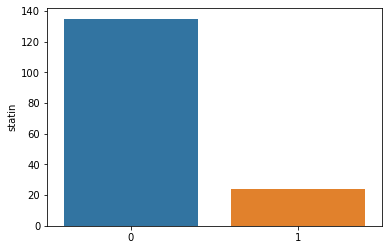

In [489]:
sns.barplot(x=X_train.statin.value_counts().index, y=X_train.statin.value_counts())

In [434]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Random forest

In [448]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# 5-fold cross validation without SMOTE
RF = RandomForestRegressor(random_state =1,criterion="absolute_error",
                           min_samples_split=10,min_samples_leaf=5,n_estimators=100)
RF.fit(X_train,y_train)
pred_values = RF.predict(X_test)
rmse = mean_squared_error(y_test,pred_values)


print('RMSE^2:')
print('{}'.format(rmse))

RMSE^2:
2.6875811577806155


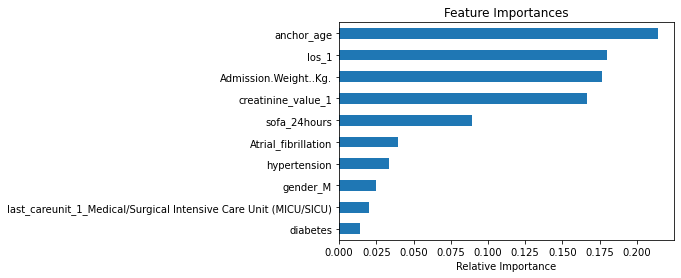

In [449]:
feat_importances = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind = 'barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

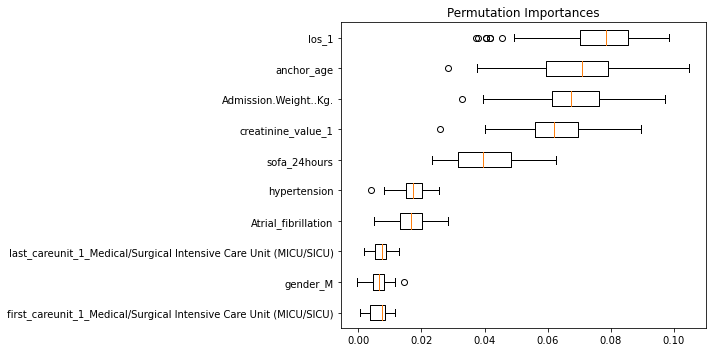

In [473]:
from sklearn.inspection import permutation_importance

result = permutation_importance(RF,
                                X_train,
                                y_train,
                                n_repeats=100,random_state =1)
sorted_idx = sorted_idx = result.importances_mean.argsort()[-10:]
        
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

## Random Forest(Oversampling Statin before group)

In [466]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
RF_smote = RandomForestRegressor(random_state =1,criterion="absolute_error",
                           min_samples_split=10,min_samples_leaf=5,n_estimators=100)

#SMOTE oversample issue for imbalanced dataset (only apply on train dataset)
X_train_smote=X_train.copy()
X_train_smote['T_max']=y_train
y_smote=X_train_smote['statin']
X_train_smote=X_train_smote.drop('statin',axis=1)
X_train_smote, y_smote = oversample.fit_resample(X_train_smote, y_smote)
y_train_smote=X_train_smote['T_max']
X_train_smote=X_train_smote.drop('T_max',axis=1)
RF_smote.fit(X_train_smote,y_train_smote)
pred_values = RF_smote.predict(X_test.drop('statin',axis=1))
rmse = mean_squared_error(y_test,pred_values)


print('RMSE:')
print('{}'.format(rmse))

RMSE:
2.7344538397865077


In [488]:
X_train_smote['Intervention_Statin before'].value_counts()

0    135
1    135
Name: Intervention_Statin before, dtype: int64

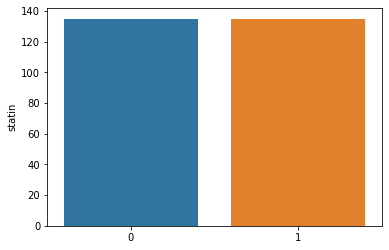

In [494]:
ax=sns.barplot(x=X_train_smote['Intervention_Statin before'].value_counts().index, y=X_train_smote['Intervention_Statin before'].value_counts())
ax.set( ylabel='statin')
plt.show()

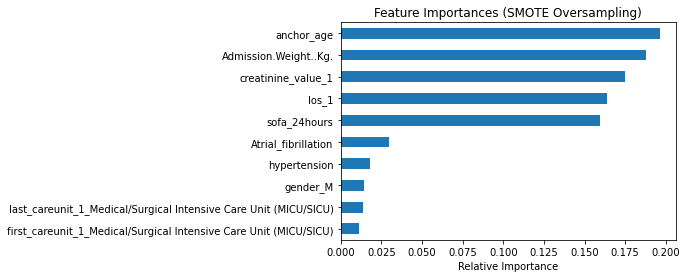

In [469]:
feat_importances = pd.Series(RF_smote.feature_importances_, index=X_train_smote.columns)
feat_importances.nlargest(10).sort_values().plot(kind = 'barh')
plt.title('Feature Importances (SMOTE Oversampling)')
plt.xlabel('Relative Importance')
plt.show()

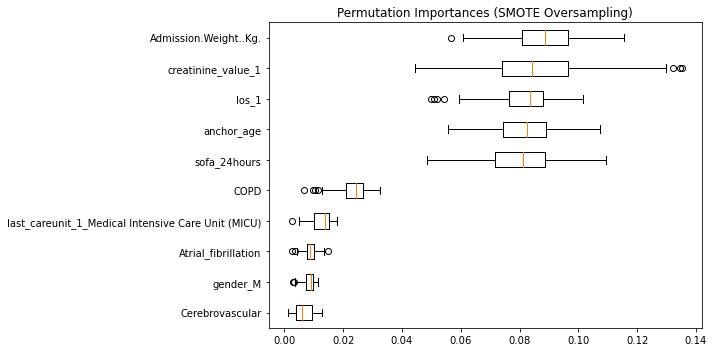

In [471]:
from sklearn.inspection import permutation_importance

result = permutation_importance(RF_smote,
                                X_train_smote,y_train_smote,
                                n_repeats=100,random_state =1)
sorted_idx = sorted_idx = result.importances_mean.argsort()[-10:]
        
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (SMOTE Oversampling)")
fig.tight_layout()
plt.show()